In [1]:
# Libraries
# For implementing Bag of words
from sklearn.feature_extraction.text import CountVectorizer
# For implementing Linear Regression
from sklearn.linear_model import LinearRegression
# For implementing Support Vector Regression
from sklearn.svm import SVR
# For implementing Linear SVR
from sklearn.svm import LinearSVR

# For implementing CART
from sklearn.tree import DecisionTreeRegressor
# R2 Score
from sklearn.metrics import r2_score
# MAE Score
from sklearn.metrics import mean_absolute_error
# To convert string list into List object
from ast import literal_eval

import pandas as pd
import json
import numpy as np
import random as rnd
import time
import re

# For Scaling of preprocessing data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the CART decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

seed = 101

The data from 2006 to 2008 is taken as train and the data of 2009 is taken as test 
Inorder to fast retrieve the records faster the following steps were done
1. The records are retrieved from the 4 files and put to a single dataframe,
2. Duplicates if any were removed,
3. Then the records are ordered in decreasing order of the citation number and 
4. They are put in the CSV file

In [2]:
data_train_Complete = pd.read_csv('Data/train_case_one.csv')
data_test_Complete = pd.read_csv('Data/test_case_one.csv')

In [3]:
data_train_Complete.head()

,Unnamed: 0,abstract,authors,id,n_citation,references,title,venue,year
0,0,Cryptosystem designers frequently assume that ...,"['Paul C. Kocher', 'Joshua M. Jaffe', 'Benjami...",033ebb72-0119-4cc9-89b8-f011c55ddd79,7091,[],Differential power analysis,Lecture Notes in Computer Science,1999
1,1,NaN,"['Jan C. A. van der Lubbe', 'Hendrik Jan Hoeue...",8dd4158a-bbc4-40cf-a4d5-14e0fe630387,3925,[],Information theory,NaN,1997
2,2,NaN,"['Nir Friedman', 'Michal Linial', 'Iftach Nach...",abad0cf5-6b84-4c40-91a2-f6ca3ad7fbc1,3515,"['007cf08c-7de6-437c-ae53-8b41e276a9a6', '1106...",Using Bayesian networks to analyze expression ...,Journal of Computational Biology,2000
3,3,Adaptive hypermedia is a relatively new direct...,['Peter Brusilovsky'],8ab23f4b-0b87-42ed-9922-dbd10d9e845d,3192,"['01c65f07-9d53-4844-8e25-ada6745a05d8', '13ca...",Adaptive Hypermedia,NaN,2001
4,4,NaN,"['Andrew Blake', 'A. Zisserman']",3f4cc95c-5f47-4031-8671-e23ff4fe2ed2,2652,[],Visual reconstruction,NaN,1987


In [4]:
# The total length of the training and test set data
print(len(data_train_Complete))
print(len(data_test_Complete))

9345
519


In [5]:
# Coping the training and test data
data_train= data_train_Complete
data_test= data_test_Complete

In [6]:
# The structure of frame along wth the data from training and test data
print(data_train.head(2))
print(data_test.head(2))

# The total number of rows of training and test data
print(len(data_train))
print(len(data_test.head(2)))

   Unnamed: 0                                           abstract  \
0           0  Cryptosystem designers frequently assume that ...   
1           1                                                NaN   

                                             authors  \
0  ['Paul C. Kocher', 'Joshua M. Jaffe', 'Benjami...   
1  ['Jan C. A. van der Lubbe', 'Hendrik Jan Hoeue...   

                                     id  n_citation references  \
0  033ebb72-0119-4cc9-89b8-f011c55ddd79        7091         []   
1  8dd4158a-bbc4-40cf-a4d5-14e0fe630387        3925         []   

                         title                              venue  year  
0  Differential power analysis  Lecture Notes in Computer Science  1999  
1           Information theory                                NaN  1997  
   Unnamed: 0                                           abstract  \
0           0  We consider a problem of considerable practica...   
1           1  We show how to learn a deep graphical model of...   



In [7]:
print(len(data_train))
print(len(data_test))

9345
519


# Training - AuthorCumulativeCitationCount(AcCc) Feature

In [8]:
# # Training Set Data

# Indexing is done to remove any discrepancies between removal of records during drop of rows
data_train.index = pd.RangeIndex(len(data_train_Complete.index))

data_id_train = data_train['id']
data_Author_train = data_train['authors']
data_numberOfCitation_train = data_train['n_citation']
####################################################################################

data_Author_train = data_Author_train
data_numberOfCitation_train = data_numberOfCitation_train

In [9]:
# Length of Train Data
print(len(data_numberOfCitation_train))

9345


In [10]:
# Train################################################################
# Here we are combining first and last name of authors to identify them
# Our assumption is all authors have unique name and they are different based on their name 

# Find all authors from all the papers and store in a list
X_train_authorValue=list()
for key, value in data_Author_train.items():
    X_train_authorValue.append(value)
    
##########################################################################################

# Here we make name in X_train_authorValue as lowercase and combine the first and last name 
# And remove any spaces,special character - between names 

X_train_authorValue=','.join(str(e).lower().replace(" ","") for e in data_Author_train[0:len(data_Author_train)])
X_train_authorValue=X_train_authorValue.replace('-','')
X_train_authorValue=X_train_authorValue.replace('.','')

# Copy contents to new string and replace blank and special character like '[', ']' inside the name
X_train_allAuthorsNew=X_train_authorValue.replace('[','')
X_train_allAuthorsNew=X_train_allAuthorsNew.replace(']','')
X_train_allAuthorsNew=X_train_allAuthorsNew.replace(" ","")

# We create an array X_train_authorValueArray of authors for papers by using ],[ as splitting criterion 
X_train_authorValueArray=X_train_authorValue.split('],[')
X_train_authorValueArray = [s.replace('[', '') for s in X_train_authorValueArray]
X_train_authorValueArray = [s.replace(']', '') for s in X_train_authorValueArray]

In [11]:
# Train################################################################
# Bag of Words Implementation
train_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 500000) 
train_sentences=[X_train_allAuthorsNew]
train_data_features = train_vectorizer.fit_transform(train_sentences)
train_vectorizerActual=train_vectorizer.transform([value for value in X_train_authorValueArray[0:len(X_train_authorValueArray)]])
# train_vectorList = train_vectorizer.transform([value for value in X_train_authorValueArray[0:len(X_train_authorValueArray)]]).toarray()
train_vectorList = pd.SparseDataFrame(train_vectorizerActual).fillna(0)
############################################################################
train_authorList=pd.DataFrame(train_vectorizer.get_feature_names()).rename(index=int, columns={0: "authorList"})

In [12]:
# Get Number of authors Feature Names after implementation of bag of words
print(len(train_vectorizer.get_feature_names()))

20591


In [13]:
# Finding Total Number of Papers written by different author
train_authorInfo=pd.DataFrame(train_vectorList)
train_TotalNumberOfPapers = pd.DataFrame(train_authorInfo.sum(axis=0)).rename(index=int, columns={0: "TotalNumberOfPapers"})
train_TotalNumberOfPapers['authorList']=train_authorList

# Filtering the authors who has written only one paper
train_TotalNumberOfPapers_1=train_TotalNumberOfPapers[train_TotalNumberOfPapers['TotalNumberOfPapers']==1]

In [14]:
train_TotalNumberOfPapers.isnull().values.any()

False

In [15]:
print('The total length = %d and percentage = %f'%( len(train_TotalNumberOfPapers_1),(len(train_TotalNumberOfPapers_1)/len(train_TotalNumberOfPapers))*100))

The total length = 17162 and percentage = 83.347093


In [16]:
# Append the sparse matrix to a dataframe and number of citation for each paper
train_dataAuthorAndCitation=pd.DataFrame(train_vectorList)
train_dataAuthorCitationAndVenueWeights=train_dataAuthorAndCitation.copy()
train_dataAuthorCitationAndVenueWeights['n_citation']=data_numberOfCitation_train

In [17]:
train_dataAuthorCitationAndVenueWeights.head(2)

,0,1,2,3,4,5,6,7,8,9,...,20582,20583,20584,20585,20586,20587,20588,20589,20590,n_citation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7091
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3925


In [18]:
# train_dataAuthorCitationAndVenueWeights.to_csv('../Data/Authors/train_bagOfWordsSparseMatrixOutput.csv')

In [19]:
# Correlation of every value for Author to number of Citations for each paper(Do not make any sense)
# Takes a long time to compute as there are 9345(Number of papers) and 20591(Number of authors) 
# train_corr = train_dataAuthorCitationAndVenueWeights.corr()
# sns.heatmap(train_corr);
# train_corr

In [20]:
# train_dataAuthorCitationAndVenueWeights.to_csv('../Data/Authors/train_bagOfWordsSparseMatrixOutput.csv')

In [21]:
# Takes a long time to compute as there are 9345(Number of papers) and 20591(Number of authors) 
# Also does not make any sense
# print(train_corr.info())
# print(train_corr.mean().mean())

In [22]:
# Calculating total number of citation author has during the period 
# and assigning it to frame train_sumOfCitationForAuthors 

train_sumOfCitationForAuthors=pd.DataFrame(train_authorInfo.multiply(pd.DataFrame(data_numberOfCitation_train)["n_citation"], axis = 0).sum(axis=0)).rename(index=int, columns={0: "SumOfCitationCount"})

# Calculating average citation for authors by dividing total number of citations by total number of papers
# written by the authors  
train_averageCitationForAuthors = pd.DataFrame(train_sumOfCitationForAuthors.div(train_TotalNumberOfPapers['TotalNumberOfPapers'],axis=0)).rename(index=int, columns={0: "AverageCitationCount"})

# Assigning train_sumOfCitationForAuthors and AverageCitationCount 
# to the frame train_author_InformationFinal for each authors
train_author_InformationFinal=pd.DataFrame(train_TotalNumberOfPapers)
train_author_InformationFinal['SumOfCitationCount'] = train_sumOfCitationForAuthors
train_author_InformationFinal['AverageCitationCount'] = train_averageCitationForAuthors

In [23]:
# First 1st 3 rows of train_author_InformationFinal
train_author_InformationFinal.head(3)

,TotalNumberOfPapers,authorList,SumOfCitationCount,AverageCitationCount
0,1.0,aabdallah,0.0,0.0
1,1.0,aabhasvpaliwal,0.0,0.0
2,1.0,aadyashukla,0.0,0.0


In [24]:
# Last 10 rows of train_author_InformationFinal
train_author_InformationFinal.tail(10)

,TotalNumberOfPapers,authorList,SumOfCitationCount,AverageCitationCount
20581,1.0,øyvindryan,0.0,0.0
20582,1.0,úlfarerlingsson,0.0,0.0
20583,1.0,ünalufuktepe,0.0,0.0
20584,1.0,łukaszmikulski,0.0,0.0
20585,1.0,佐千男廣川,0.0,0.0
20586,1.0,弘士井上,0.0,0.0
20587,1.0,泰寛山田,0.0,0.0
20588,1.0,王佳文,0.0,0.0
20589,1.0,金堀利洋,0.0,0.0
20590,1.0,鈴木昌和,0.0,0.0


In [25]:
# Creating the duplicate frame train_author_InformationDup from train_author_InformationFinal
# Dropping SumOfCitationCount and TotalNumberOfPapers column from the frame
train_author_InformationDup=pd.DataFrame(train_author_InformationFinal)
train_author_InformationDup.drop(['SumOfCitationCount'], axis=1,inplace=True)
train_author_InformationDup.drop(['TotalNumberOfPapers'], axis=1,inplace=True)

In [26]:
# First 4 rows for train_author_InformationDup
train_author_InformationDup.head(4)

,authorList,AverageCitationCount
0,aabdallah,0.0
1,aabhasvpaliwal,0.0
2,aadyashukla,0.0
3,aagrequicha,50.0


In [27]:
# First 10 rows for train_author_InformationDup
train_author_InformationDup.head(10)

,authorList,AverageCitationCount
0,aabdallah,0.0
1,aabhasvpaliwal,0.0
2,aadyashukla,0.0
3,aagrequicha,50.0
4,aalique,0.0
5,aamalykh,0.0
6,aapohyvärinen,0.0
7,aapost,71.0
8,aaramyun,0.0
9,aaronarcher,0.0


In [28]:
# Last 3 rows of train_author_InformationDup
train_author_InformationDup.tail(3)

,authorList,AverageCitationCount
20588,王佳文,0.0
20589,金堀利洋,0.0
20590,鈴木昌和,0.0


In [29]:
# Description of train_author_InformationDup 
train_author_InformationDup.describe()

,AverageCitationCount
count,20591.000000
mean,28.419493
std,134.925981
min,0.000000
25%,0.000000
50%,0.000000
75%,50.000000
max,7091.000000


In [30]:
# train_author_InformationDup statistics
train_author_InformationDup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20591 entries, 0 to 20590
Data columns (total 2 columns):
authorList              20591 non-null object
AverageCitationCount    20591 non-null float64
dtypes: float64(1), object(1)
memory usage: 482.6+ KB


In [31]:
# Initial Trial based on the paper and later upgraded it
# Assigning ranking weights to authors based on the original order using left join
# train_data_authorPapers= pd.DataFrame(pd.merge(train_author_InformationFinal, train_author_InformationDup, on='authorList',how='left'))         

# Removing duplicates column formed during join operation
# train_data_authorPapers.drop(['AverageCitationCount_x','AverageCitationCount_y'],axis=1,inplace=True)

In [32]:
# Copy of train_author_InformationDup
train_data_authorPapers=train_author_InformationDup.copy()

In [33]:
# First 4 rows of train_data_authorPapers
train_data_authorPapers.head(4)

,authorList,AverageCitationCount
0,aabdallah,0.0
1,aabhasvpaliwal,0.0
2,aadyashukla,0.0
3,aagrequicha,50.0


In [34]:
# Copy frame to another train_authorInfo
train_authorInfoNew=train_authorInfo.copy()

# Transposing the AverageCitationCount feature from column to a single row
# so that the cumulating Ranking weight ['CumulativeAuthorCitationCount'] can be found out
# And adding column TotalNumberOfAuthors for the paper to the same frame

train_authorAverageCitationCount=pd.DataFrame((train_data_authorPapers)["AverageCitationCount"]).T
train_authorInfoNew['CumulativeAuthorCitationCount']=pd.DataFrame(train_authorInfo.iloc[:,range(0,len(train_authorInfo.columns))].values*train_authorAverageCitationCount.iloc[:,range(0,len(train_authorAverageCitationCount.columns))].values).sum(axis=1)
train_authorInfoNew['TotalNumberOfAuthors']=pd.DataFrame(train_authorInfo.sum(axis=1))

In [35]:
# First 3 rows of train_authorInfoNew
train_authorInfoNew.head(3)

,0,1,2,3,4,5,6,7,8,9,...,20583,20584,20585,20586,20587,20588,20589,20590,CumulativeAuthorCitationCount,TotalNumberOfAuthors
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21273.0,3.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11775.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14955.0,5.0


In [36]:
# Dropping the numbered indexes related to Authors and 
# adding a new column/Feature called AverageCumulativeAuthorCitationCount (AcCc) 
# found by dividing CumulativeAuthorCitationCount by TotalNumberOfAuthors for each paper

train_authorInfoNewCopy=train_authorInfoNew.copy()
train_authorInfoNewCopy.drop(range(0,len(train_authorInfoNewCopy.columns)-2),axis=1,inplace=True)
train_authorInfoNewCopy['AverageCumulativeAuthorCitationCount']=pd.DataFrame(train_authorInfoNewCopy['CumulativeAuthorCitationCount'].div(train_authorInfoNewCopy["TotalNumberOfAuthors"], axis = 0)).rename(index=int, columns={0: "AverageCumulativeAuthorCitationCount"})['AverageCumulativeAuthorCitationCount']

In [37]:
# First 3 rows of train_authorInfoNewCopy
train_authorInfoNewCopy.head(3)

,CumulativeAuthorCitationCount,TotalNumberOfAuthors,AverageCumulativeAuthorCitationCount
0,21273.0,3.0,7091.0
1,11775.0,3.0,3925.0
2,14955.0,5.0,2991.0


In [38]:
# Assigning columns id and n_citation to train_authorInfoNewCopy
train_authorInfoNewCopy['n_citation']=data_numberOfCitation_train
train_authorInfoNewCopy['id']=data_id_train

In [39]:
# First 3 rows of train_authorInfoNewCopy
print(train_authorInfoNewCopy.head(3))

   CumulativeAuthorCitationCount  TotalNumberOfAuthors  \
0                        21273.0                   3.0   
1                        11775.0                   3.0   
2                        14955.0                   5.0   

   AverageCumulativeAuthorCitationCount  n_citation  \
0                                7091.0        7091   
1                                3925.0        3925   
2                                2991.0        3515   

                                     id  
0  033ebb72-0119-4cc9-89b8-f011c55ddd79  
1  8dd4158a-bbc4-40cf-a4d5-14e0fe630387  
2  abad0cf5-6b84-4c40-91a2-f6ca3ad7fbc1  


### Correlation - AverageCumulativeAuthorCitationCount(AcCc) vs n_citation  

,CumulativeAuthorCitationCount,TotalNumberOfAuthors,AverageCumulativeAuthorCitationCount,n_citation
CumulativeAuthorCitationCount,1.000000,0.106979,0.900799,0.866391
TotalNumberOfAuthors,0.106979,1.000000,-0.019817,-0.017709
AverageCumulativeAuthorCitationCount,0.900799,-0.019817,1.000000,0.954561
n_citation,0.866391,-0.017709,0.954561,1.000000


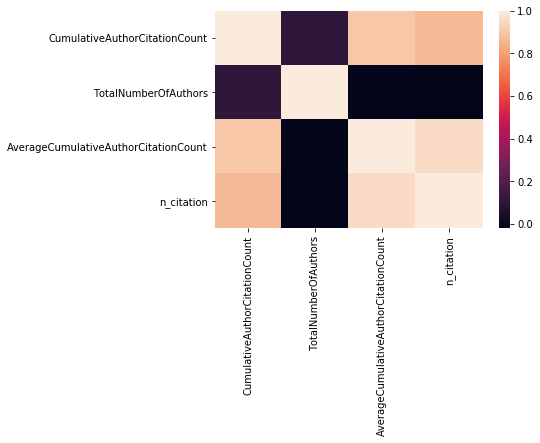

In [40]:
# Correlation Heat Map 
# Correlation between AverageCumulativeAuthorCitationCount(AcCc) and n_citation found to be 0.954561
corr = train_authorInfoNewCopy.corr()
sns.heatmap(corr);
corr

In [41]:
# Information about train_authorInfoNewCopy
train_authorInfoNewCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9345 entries, 0 to 9344
Data columns (total 5 columns):
CumulativeAuthorCitationCount           9345 non-null float64
TotalNumberOfAuthors                    9345 non-null float64
AverageCumulativeAuthorCitationCount    9345 non-null float64
n_citation                              9345 non-null int64
id                                      9345 non-null object
dtypes: float64(3), int64(1), object(1)
memory usage: 365.1+ KB


In [42]:
# Drop the columns n_citation,CumulativeAuthorCitationCount,TotalNumberOfAuthors
train_authorInfoNewCopy.drop(['n_citation','CumulativeAuthorCitationCount','TotalNumberOfAuthors'],axis=1,inplace=True)

# Training - Age Feature

In [43]:
# Created a new feature called age. 
# age = "Aminer citation data released" - "paper published year"
# Release date of Aminer version 10 dataset is 2018.
train = data_train
train['age'] = 2018 - train.year

# Training - Average Venue Citation Feature

In [44]:
# Created a new feature called Average Venue citation(avgVenueCite). 
# avgVenueCite = (Sum of citation count of all the papers presented at the venue)/(Total number of papers presented at the venue)
# Stored venue and its avgVenueCite in '../Data/AvgVenueCitationFromTrainData.csv' file.
train = data_train
AvgVenueCite = pd.read_csv('Data/AvgVenueCitationFromTrainData_case_one.csv')

In [45]:
# Merged train data with its avgVenueCite.
train_venue = pd.merge(train, AvgVenueCite, on=['venue'], how='left')

In [46]:
# dropped unwanted columns from train data.
train_venue.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis=1,inplace=True)

In [47]:
train_venue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 9344
Data columns (total 10 columns):
abstract        4860 non-null object
authors         9345 non-null object
id              9345 non-null object
n_citation      9345 non-null int64
references      9345 non-null object
title           9345 non-null object
venue           6059 non-null object
year            9345 non-null int64
age             9345 non-null int64
avgVenueCite    6059 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 803.1+ KB


In [48]:
# Assumption: assigned "average venue citation" to 0 for all the venues who's rank is not available.
train_venue['avgVenueCite'] = train_venue.avgVenueCite.replace(np.nan, 0)

,avgVenueCite,n_citation
avgVenueCite,1.000000,0.291017
n_citation,0.291017,1.000000


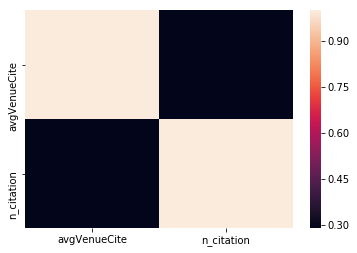

In [49]:
# finding correlation between "Average Venue Citation" and "Citation count".
corrmat = train_venue[['avgVenueCite', 'n_citation']].corr()

sns.heatmap(corrmat);
corrmat

In [50]:
train = train_venue
train.head(1)

,abstract,authors,id,n_citation,references,title,venue,year,age,avgVenueCite
0,Cryptosystem designers frequently assume that ...,"['Paul C. Kocher', 'Joshua M. Jaffe', 'Benjami...",033ebb72-0119-4cc9-89b8-f011c55ddd79,7091,[],Differential power analysis,Lecture Notes in Computer Science,1999,19,16.943557


# Training - Aminer Venue Rank and Aminer H-5 Index

In [51]:
# Webscrapped Conference Ranks and H5-Index from 'https://www.aminer.cn/ranks/conf' website and
# stored into "../Data/Aminer_Conf_Ranks.csv" file.
# Column order in "Aminer_Conf_Ranks.csv" is [Rank, Conference, Short Name, H5-Index]
# Rank range from 1 to 1000, where 1000 means buttom and 1 means top.
# H5-Index range from 0 and increases, where 0 means buttom and highest means top.
aminer_data = pd.read_csv('Data/Aminer_Conf_Ranks.csv', index_col='Unnamed: 0')
aminer_data.drop(['Short Name'], axis=1, inplace=True)

In [52]:
# added a empty venue with Rank: 1000 and H5-Index:0
# Assumption: Rank = 1000 and H5-Index = 0 will be assigned to all the papers with empty venue.
empty_venue = [1000, '', 0]
aminer_data = aminer_data.append(pd.Series(empty_venue, index=aminer_data.columns ), ignore_index=True)

In [53]:
# renamed column name from 'Conference' to 'venue' for easy merging. 
# also converted venue feature in aminer_data and train data to lower case for a easy match while merging
aminer_data.rename(index=str, columns={"Conference": "venue"}, inplace=True)

train.venue = train.venue.str.lower()
aminer_data.venue = aminer_data.venue.str.lower()

In [54]:
# dropped duplicates if any while webscraping
aminer_data = aminer_data.drop_duplicates(subset=['venue'])

In [55]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 9344
Data columns (total 10 columns):
abstract        4860 non-null object
authors         9345 non-null object
id              9345 non-null object
n_citation      9345 non-null int64
references      9345 non-null object
title           9345 non-null object
venue           6059 non-null object
year            9345 non-null int64
age             9345 non-null int64
avgVenueCite    9345 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 803.1+ KB


In [56]:
# Assumption: replaced all 'NaN' in venue to empty string which inturn gets Rank:1000 and H5-Index:0 
# after merging.
train['venue'] = train['venue'].replace(np.nan, '')

In [57]:
aminer_data.head()

,Rank,venue,H5-Index
0,1,science,162.0
1,2,nucleic acids research,128.0
2,3,ieee conference on computer vision and pattern...,112.0
3,4,ieee transactions on pattern analysis and mach...,101.0
4,5,neuroimage,99.0


In [58]:
# merged 'Rank', 'H5-Index' to the train data on 'venue' feature.
train_aminer = pd.merge(train, aminer_data,  how='left', on=['venue'])

In [59]:
len(train_aminer)

9345

In [60]:
# Assumption: replaced all unmatached venue's Rank and H5-Index with 1000 and 0 respectively.
train_aminer['Rank'] = train_aminer['Rank'].replace(np.nan, 1000)
train_aminer['H5-Index'] = train_aminer['H5-Index'].replace(np.nan, 0)

In [61]:
train_aminer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 9344
Data columns (total 12 columns):
abstract        4860 non-null object
authors         9345 non-null object
id              9345 non-null object
n_citation      9345 non-null int64
references      9345 non-null object
title           9345 non-null object
venue           9345 non-null object
year            9345 non-null int64
age             9345 non-null int64
avgVenueCite    9345 non-null float64
Rank            9345 non-null float64
H5-Index        9345 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 949.1+ KB


In [62]:
train_aminer.head()

,abstract,authors,id,n_citation,references,title,venue,year,age,avgVenueCite,Rank,H5-Index
0,Cryptosystem designers frequently assume that ...,"['Paul C. Kocher', 'Joshua M. Jaffe', 'Benjami...",033ebb72-0119-4cc9-89b8-f011c55ddd79,7091,[],Differential power analysis,lecture notes in computer science,1999,19,16.943557,1000.0,0.0
1,NaN,"['Jan C. A. van der Lubbe', 'Hendrik Jan Hoeue...",8dd4158a-bbc4-40cf-a4d5-14e0fe630387,3925,[],Information theory,,1997,21,0.000000,1000.0,0.0
2,NaN,"['Nir Friedman', 'Michal Linial', 'Iftach Nach...",abad0cf5-6b84-4c40-91a2-f6ca3ad7fbc1,3515,"['007cf08c-7de6-437c-ae53-8b41e276a9a6', '1106...",Using Bayesian networks to analyze expression ...,journal of computational biology,2000,18,224.073171,308.0,26.0
3,Adaptive hypermedia is a relatively new direct...,['Peter Brusilovsky'],8ab23f4b-0b87-42ed-9922-dbd10d9e845d,3192,"['01c65f07-9d53-4844-8e25-ada6745a05d8', '13ca...",Adaptive Hypermedia,,2001,17,0.000000,1000.0,0.0
4,NaN,"['Andrew Blake', 'A. Zisserman']",3f4cc95c-5f47-4031-8671-e23ff4fe2ed2,2652,[],Visual reconstruction,,1987,31,0.000000,1000.0,0.0


### Correlation - Aminer venue rank vs citation count 

In [63]:
AminerRank_cite = train_aminer[['Rank', 'n_citation']]

In [64]:
AminerRank_cite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 9344
Data columns (total 2 columns):
Rank          9345 non-null float64
n_citation    9345 non-null int64
dtypes: float64(1), int64(1)
memory usage: 219.0 KB


,Rank,n_citation
Rank,1.000000,-0.085795
n_citation,-0.085795,1.000000


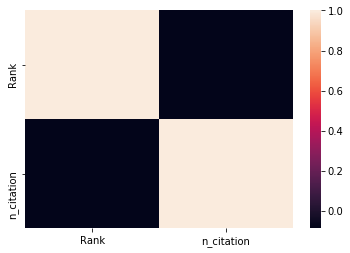

In [65]:
# correlation between Rank and Citation count.
corrmat = AminerRank_cite.corr()

sns.heatmap(corrmat);
corrmat

### Correlation - Aminer H5 Index vs Citation Count

In [66]:
AminerH5Index_cite = train_aminer[['H5-Index', 'n_citation']]

In [67]:
AminerH5Index_cite.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 9344
Data columns (total 2 columns):
H5-Index      9345 non-null float64
n_citation    9345 non-null int64
dtypes: float64(1), int64(1)
memory usage: 219.0 KB


,H5-Index,n_citation
H5-Index,1.000000,0.082413
n_citation,0.082413,1.000000


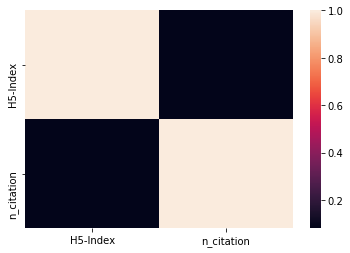

In [68]:
# Correlation between H5-Index and citation count.
corrmat = AminerH5Index_cite.corr()

sns.heatmap(corrmat);
corrmat

### Correlation - Age Of Paper vs Citation Count

In [69]:
AminerH5Index_age = train_aminer[['age', 'n_citation']]

In [70]:
AminerH5Index_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 9344
Data columns (total 2 columns):
age           9345 non-null int64
n_citation    9345 non-null int64
dtypes: int64(2)
memory usage: 219.0 KB


,age,n_citation
age,1.000000,0.060597
n_citation,0.060597,1.000000


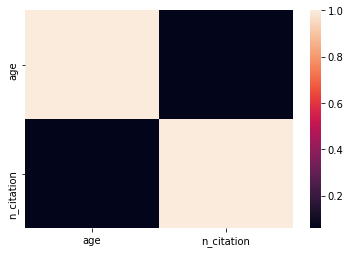

In [71]:
# Correlation between age and citation count.
corrmat = AminerH5Index_age.corr()
 
sns.heatmap(corrmat);
corrmat

# Training - References Ctation Count Feature
#### This feature is created considering that the extension of a good work will gernerate a good paper too. 

##### Reference Citation Count = sum(referred paper's citation count) / (Total No. of referred paper's)

In [72]:
# Created a sub dataframe of required feature to calcualte Reference Citation Count
train_ref = train[['id', 'references', 'n_citation']]

In [73]:
# Converted string structured list to list object.
train_ref['references'] = train_ref['references'].apply(literal_eval)

C:\Users\Suresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [74]:
train_ref.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 9344
Data columns (total 3 columns):
id            9345 non-null object
references    9345 non-null object
n_citation    9345 non-null int64
dtypes: int64(1), object(2)
memory usage: 292.0+ KB


In [75]:
train_ref[train_ref['id'] == "02e81c9e-f2ae-4335-b2e2-416eb95df3ac"]

,id,references,n_citation
5639,02e81c9e-f2ae-4335-b2e2-416eb95df3ac,[],0


In [76]:
# created a list of referred paper's citation count 
# using that list max, sum and average as been calculated. 
for i, row in train_ref.iterrows():
#     print(row.references)
    count = [0]
    for ref in row.references:
        ref_data = train_ref[train_ref.id == ref]
        if not ref_data.empty:
            count.append(ref_data.iat[0,2])
#             if count > 0:
#                 print(i, ref_data.index, count)
    train_ref.at[i, 'ref_max_count'] = max(count)
    train_ref.at[i, 'ref_sum_count'] = sum(count)
    train_ref.at[i, 'ref_avg_count'] = sum(count)/len(count)
    print(i, end='\r')

C:\Users\Suresh\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Suresh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### Correlation - References citation count vs citation count

In [77]:
# correlation between max, sum, avg of referred paper's citation count and citation count of the paper
corrmat = train_ref[['ref_max_count', 'ref_sum_count', 'ref_avg_count', 'n_citation']].corr()

,ref_max_count,ref_sum_count,ref_avg_count,n_citation
ref_max_count,1.000000,0.998844,0.993003,0.070293
ref_sum_count,0.998844,1.000000,0.986581,0.068354
ref_avg_count,0.993003,0.986581,1.000000,0.074664
n_citation,0.070293,0.068354,0.074664,1.000000


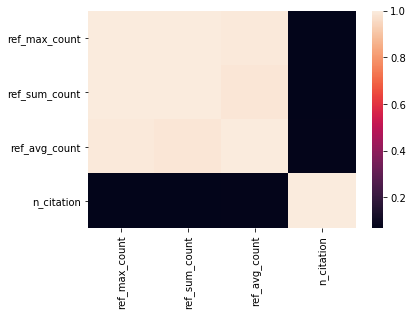

In [78]:
sns.heatmap(corrmat);
corrmat

In [79]:
len(train_aminer)

9345

In [80]:
# Since average of "reference citation count" gave a good correlation compare to max and sum
# So max and sum of "reference citation count" are not considered for training.
train_aminer = pd.merge(train_aminer, train_ref.drop(['ref_max_count','ref_sum_count','references','n_citation'],axis=1),  how='left', on=['id'])

In [81]:
train_aminer.head()

,abstract,authors,id,n_citation,references,title,venue,year,age,avgVenueCite,Rank,H5-Index,ref_avg_count
0,Cryptosystem designers frequently assume that ...,"['Paul C. Kocher', 'Joshua M. Jaffe', 'Benjami...",033ebb72-0119-4cc9-89b8-f011c55ddd79,7091,[],Differential power analysis,lecture notes in computer science,1999,19,16.943557,1000.0,0.0,0.0
1,NaN,"['Jan C. A. van der Lubbe', 'Hendrik Jan Hoeue...",8dd4158a-bbc4-40cf-a4d5-14e0fe630387,3925,[],Information theory,,1997,21,0.000000,1000.0,0.0,0.0
2,NaN,"['Nir Friedman', 'Michal Linial', 'Iftach Nach...",abad0cf5-6b84-4c40-91a2-f6ca3ad7fbc1,3515,"['007cf08c-7de6-437c-ae53-8b41e276a9a6', '1106...",Using Bayesian networks to analyze expression ...,journal of computational biology,2000,18,224.073171,308.0,26.0,685.5
3,Adaptive hypermedia is a relatively new direct...,['Peter Brusilovsky'],8ab23f4b-0b87-42ed-9922-dbd10d9e845d,3192,"['01c65f07-9d53-4844-8e25-ada6745a05d8', '13ca...",Adaptive Hypermedia,,2001,17,0.000000,1000.0,0.0,0.0
4,NaN,"['Andrew Blake', 'A. Zisserman']",3f4cc95c-5f47-4031-8671-e23ff4fe2ed2,2652,[],Visual reconstruction,,1987,31,0.000000,1000.0,0.0,0.0


# Test Data Starts
# Test - Author Feature

In [82]:
# Test Set Data
data_test.index = pd.RangeIndex(len(data_test_Complete.index))
data_Author_test = data_test['authors']
data_numberOfCitation_test = data_test['n_citation']
data_id_test = data_test['id']

In [83]:
print(len(data_numberOfCitation_test))

519


In [84]:
# Test################################################################
# Here we are combining first and last name of authors to identify them
# Our assumption is all authors have unique name and they are different which may not hold true for all cases 

# Find all authors from all the papers and store in a list
X_test_authorValue=list()
for key, value in data_Author_test.items():
    X_test_authorValue.append(value)
    
##########################################################################################

# Here we make name in X_test_authorValue as lowercase and combine the first and last name 
# And remove any spaces,special character - between names 

X_test_authorValue=','.join(str(e).lower().replace(" ","") for e in data_Author_test[0:len(data_Author_test)])
X_test_authorValue=X_test_authorValue.replace('-','')
X_test_authorValue=X_test_authorValue.replace('.','')


# Copy contents to new string and replace blank and special character like '[', ']' inside the name
X_test_allAuthorsNew=X_test_authorValue.replace('[','')
X_test_allAuthorsNew=X_test_allAuthorsNew.replace(']','')
X_test_allAuthorsNew=X_test_allAuthorsNew.replace(" ","")

# We create an array X_test_authorValueArray of authors for papers by using ],[ as splitting criterion 
# And replace '[', ']' and "'" inside the name
X_test_authorValueArray=X_test_authorValue.split('],[')
X_test_authorValueArray = [s.replace('[', '') for s in X_test_authorValueArray]
X_test_authorValueArray = [s.replace(']', '') for s in X_test_authorValueArray]

In [85]:
# Test################################################################
# Bag of Words Implementation
test_vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 500000) 
test_sentences=[X_test_allAuthorsNew]
test_data_features = test_vectorizer.fit_transform(test_sentences)
test_vectorizerActual=test_vectorizer.transform([value for value in X_test_authorValueArray[0:len(X_test_authorValueArray)]])
test_vectorList = pd.SparseDataFrame(test_vectorizerActual).fillna(0)
############################################################################
test_authorList=pd.DataFrame(test_vectorizer.get_feature_names()).rename(index=int, columns={0: "authorList"})

In [86]:
# Get Number of authors Feature Names after implementation of bag of words
print(len(test_vectorizer.get_feature_names()))
# Get number of papers
print(len(test_vectorList))

1530
519


In [87]:
# Get all the authors from the test set
test_authorInfo=pd.DataFrame(test_vectorList)
test_TotalNumberOfAuthors=test_authorList.copy()

In [88]:
# Assign AverageCitationCount for the authors in test data set based on trained dataset
# For new author, the default value of zero is assigned
test_data_authorPapers= pd.merge(test_TotalNumberOfAuthors, train_author_InformationDup, on='authorList',how='left')
test_data_authorPapers['AverageCitationCount']= test_data_authorPapers['AverageCitationCount'].fillna(0)

In [89]:
# print(len(test_data_authorPapers[test_data_authorPapers['AverageCitationCount']!=0]))
# print(test_data_authorPapers[test_data_authorPapers['AverageCitationCount']!=0])

In [90]:
# Copy frame to another train_authorInfo
test_authorInfoNew=test_authorInfo.copy()

# Transposing the AverageCitationCount feature from column to a single row
# so that the cumulating Ranking weight ['CumulativeAuthorCitationCount'] can be found out
# And adding column CumulativeAuthorCitationCount for the paper to the same frame

test_authorAverageCitationCount=pd.DataFrame((test_data_authorPapers)["AverageCitationCount"]).T
test_authorInfoNew['CumulativeAuthorCitationCount']=pd.DataFrame(test_authorInfo.iloc[:,range(0,len(test_authorInfo.columns))].values*test_authorAverageCitationCount.iloc[:,range(0,len(test_authorAverageCitationCount.columns))].values).sum(axis=1)
test_authorInfoNew['TotalNumberOfAuthors']=pd.DataFrame(test_authorInfo.sum(axis=1))
test_authorInfoNew['AverageCumulativeAuthorCitationCount']=pd.DataFrame(test_authorInfoNew['CumulativeAuthorCitationCount'].div(test_authorInfoNew["TotalNumberOfAuthors"], axis = 0)).rename(index=int, columns={0: "AverageCumulativeAuthorCitationCount"})['AverageCumulativeAuthorCitationCount']

In [91]:
test_authorInfoNew.head(2)

,0,1,2,3,4,5,6,7,8,9,...,1523,1524,1525,1526,1527,1528,1529,CumulativeAuthorCitationCount,TotalNumberOfAuthors,AverageCumulativeAuthorCitationCount
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [92]:
test_DataAuthor=test_authorInfoNew.copy()
# Dropping the columns for the authors range 
test_DataAuthor.drop(range(0,len(test_DataAuthor.columns) - 3),axis=1,inplace=True)

In [93]:
# Dropping two more features CumulativeAuthorCitationCount and TotalNumberOfAuthors
test_DataAuthor.drop(['CumulativeAuthorCitationCount','TotalNumberOfAuthors'],axis=1,inplace=True)

In [94]:
# Assigning the id feature to the existing dataset with AverageCumulativeAuthorCitationCount(AcCc) dataset
test_DataAuthor['id']=data_id_test

In [95]:
# Display of the test dataset
test_DataAuthor.head(2)

,AverageCumulativeAuthorCitationCount,id
0,0.0,a5d31c22-bdb4-4f0d-ab7b-4af2a8e37b9c
1,0.0,4c5ed508-b6e5-4db5-a59f-00e1d88dc221


In [96]:
# Total number of authors who have AverageCumulativeAuthorCitationCount(AcCc) not equal to zero 
# which is due to new authors or the number of citations they got in the papers is zero(Not famous authors in the period)
print(len(test_DataAuthor[test_DataAuthor['AverageCumulativeAuthorCitationCount']!=0]))

126


In [97]:
# print(test_DataAuthor[test_DataAuthor['AverageCumulativeAuthorCitationCount']!=0].head(2))
test_DataAuthor.head(1)

,AverageCumulativeAuthorCitationCount,id
0,0.0,a5d31c22-bdb4-4f0d-ab7b-4af2a8e37b9c


# Test - Paper Age Feature

In [98]:
# age = "Aminer citation data released" - "paper published year"
# Release date of Aminer version 10 dataset is 2018.
test=data_test_Complete
test=data_test.copy()
test['age']=2018- test.year
test.head()
test.drop('Unnamed: 0',axis=1,inplace=True)

# Test - Average Venue Citation Feature(avgVenueCite)

#### avgVenueCite = (Sum of citation count of all the papers presented at the venue)/(Total number of papers presented at the venue)
#### Stored venue and its avgVenueCite in '../Data/AvgVenueCitationFromTrainData.csv' file.

In [99]:
# To change to 2009
# test=data_test_Complete
# test = pd.read_csv('../Data/test2010/test2010.csv', index_col='Unnamed: 0')

In [100]:
AvgVenueCite.drop('Unnamed: 0',axis=1,inplace=True)

In [101]:
# Merged test data with its avg citation count.
test_venue = pd.merge(test, AvgVenueCite, on=['venue'], how='left')

In [102]:
test_venue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 0 to 518
Data columns (total 10 columns):
abstract        192 non-null object
authors         519 non-null object
id              519 non-null object
n_citation      519 non-null int64
references      519 non-null object
title           519 non-null object
venue           304 non-null object
year            519 non-null int64
age             519 non-null int64
avgVenueCite    224 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 44.6+ KB


In [103]:
# Assumption: for venue who's avgVenueCite is not found in '../Data/AvgVenueCitationFromTrainData.csv'
# will be assigned with 0
test_venue.avgVenueCite.replace(np.nan, 0, inplace=True)

In [104]:
len(test_venue)

519

# Test - Aminer Venue Rank and H5- Index Features

In [105]:
test.venue = test.venue.str.lower()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519 entries, 0 to 518
Data columns (total 9 columns):
abstract      192 non-null object
authors       519 non-null object
id            519 non-null object
n_citation    519 non-null int64
references    519 non-null object
title         519 non-null object
venue         304 non-null object
year          519 non-null int64
age           519 non-null int64
dtypes: int64(3), object(6)
memory usage: 36.6+ KB


In [106]:
test=test_venue
# Assumption: for an unknown venue we assigned an empty string
# to which we give Rank and H5-Index as 1000 and 0 respectively in the next step.
test['venue'] = test['venue'].replace(np.nan, '')
test_aminer = pd.merge(test, aminer_data,  how='left', on=['venue'])
test_aminer.head()

,abstract,authors,id,n_citation,references,title,venue,year,age,avgVenueCite,Rank,H5-Index
0,We consider a problem of considerable practica...,"['Emmanuel J. Candès', 'Benjamin Recht']",a5d31c22-bdb4-4f0d-ab7b-4af2a8e37b9c,2844,"['1976db1f-ba16-433b-b918-c04a50293153', '1bfa...",Exact Matrix Completion via Convex Optimization,Foundations of Computational Mathematics,2009,9,0.00,NaN,NaN
1,We show how to learn a deep graphical model of...,"['Ruslan Salakhutdinov', 'Geoffrey E. Hinton']",4c5ed508-b6e5-4db5-a59f-00e1d88dc221,789,"['0ad38f3e-8131-4287-9e62-2b2ae77f47f7', '1ce7...",Semantic hashing,,2009,9,0.00,1000.0,0.0
2,NaN,['Jeff Z. Pan'],a5388275-30dd-4ea7-9695-5da0ecd763b5,722,"['23f1f137-5e9b-450e-ab31-c3512e3e4b47', '25f9...",Resource Description Framework,,2009,9,0.00,1000.0,0.0
3,Semi-supervised clustering algorithms aim to i...,"['Brian Kulis', 'Sugato Basu', 'Inderjit S. Dh...",1c7c10b0-2e48-4182-805e-d923ebd1a1c4,452,"['01b4a097-49a7-4218-a255-49efbd4b5e6e', '0cdb...",Semi-supervised graph clustering: a kernel app...,Machine Learning,2009,9,91.75,NaN,NaN
4,Ontology matching consists of finding correspo...,"['Jérôme Euzenat', 'Alfio Ferrara', 'Laura Hol...",f967618b-e047-43a9-bea8-44b9e74d708f,431,"['21d7d0ce-ee66-4bc3-9faa-3851f15d6036', '3bcd...",Results of the ontology alignment evaluation i...,,2009,9,0.00,1000.0,0.0


In [107]:
# Assumption: venues which are not found in "../Data/Aminer_Conf_Ranks.csv"
# are assigned with 1000 Rank and 0 H5-Index
test_aminer['Rank'] = test_aminer['Rank'].replace(np.nan, 1000)
test_aminer['H5-Index'] = test_aminer['H5-Index'].replace(np.nan, 0)
test_aminer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 519 entries, 0 to 518
Data columns (total 12 columns):
abstract        192 non-null object
authors         519 non-null object
id              519 non-null object
n_citation      519 non-null int64
references      519 non-null object
title           519 non-null object
venue           519 non-null object
year            519 non-null int64
age             519 non-null int64
avgVenueCite    519 non-null float64
Rank            519 non-null float64
H5-Index        519 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 52.7+ KB


In [108]:
test_aminer.head()

,abstract,authors,id,n_citation,references,title,venue,year,age,avgVenueCite,Rank,H5-Index
0,We consider a problem of considerable practica...,"['Emmanuel J. Candès', 'Benjamin Recht']",a5d31c22-bdb4-4f0d-ab7b-4af2a8e37b9c,2844,"['1976db1f-ba16-433b-b918-c04a50293153', '1bfa...",Exact Matrix Completion via Convex Optimization,Foundations of Computational Mathematics,2009,9,0.00,1000.0,0.0
1,We show how to learn a deep graphical model of...,"['Ruslan Salakhutdinov', 'Geoffrey E. Hinton']",4c5ed508-b6e5-4db5-a59f-00e1d88dc221,789,"['0ad38f3e-8131-4287-9e62-2b2ae77f47f7', '1ce7...",Semantic hashing,,2009,9,0.00,1000.0,0.0
2,NaN,['Jeff Z. Pan'],a5388275-30dd-4ea7-9695-5da0ecd763b5,722,"['23f1f137-5e9b-450e-ab31-c3512e3e4b47', '25f9...",Resource Description Framework,,2009,9,0.00,1000.0,0.0
3,Semi-supervised clustering algorithms aim to i...,"['Brian Kulis', 'Sugato Basu', 'Inderjit S. Dh...",1c7c10b0-2e48-4182-805e-d923ebd1a1c4,452,"['01b4a097-49a7-4218-a255-49efbd4b5e6e', '0cdb...",Semi-supervised graph clustering: a kernel app...,Machine Learning,2009,9,91.75,1000.0,0.0
4,Ontology matching consists of finding correspo...,"['Jérôme Euzenat', 'Alfio Ferrara', 'Laura Hol...",f967618b-e047-43a9-bea8-44b9e74d708f,431,"['21d7d0ce-ee66-4bc3-9faa-3851f15d6036', '3bcd...",Results of the ontology alignment evaluation i...,,2009,9,0.00,1000.0,0.0


In [109]:
test_aminer.drop(['authors','title','venue'],axis=1,inplace=True)

# Test - Reference Count Features

##### Reference Citation Count = sum(referred paper's citation count) / (Total No. of referred paper's)

In [110]:
# Created a sub dataframe of required feature to calcualte Reference Citation Count
test_ref = test[['id', 'references', 'n_citation']]

In [111]:
# Converted string structured list to list object.
test_ref['references'] = test_ref['references'].apply(literal_eval)

C:\Users\Suresh\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
# created a list of referred paper's citation count 
# using that list max, sum and average as been calculated.
for i, row in test_ref.iterrows():
#     print(row.references)
    count = [0]
    for ref in row.references:
        ref_data = test_ref[test_ref.id == ref]
        if not ref_data.empty:
            count.append(ref_data.iat[0,2])
#             if count > 0:
#                 print(i, ref_data.index, count)
    test_ref.at[i, 'ref_max_count'] = max(count)
    test_ref.at[i, 'ref_sum_count'] = sum(count)
    test_ref.at[i, 'ref_avg_count'] = sum(count)/len(count)
    print(i, end='\r')

C:\Users\Suresh\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Suresh\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [113]:
# correlation between max, sum, avg of referred paper's citation count and citation count of the paper
test_aminer = pd.merge(test_aminer, test_ref.drop(['ref_max_count','ref_sum_count','references','n_citation'],axis=1),  how='left', on=['id'])

# Application of Machine Learning Model

In [114]:
# Four datasets formed
# X_train and Y_train are for training 
# X_test and Y_test are for testing

X_train = pd.merge(train_aminer, train_authorInfoNewCopy,  how='left', on=['id'])
Y_train= train_aminer['n_citation']
X_test = pd.merge(test_aminer, test_DataAuthor,  how='left', on=['id'])
Y_test = test_aminer['n_citation']

In [115]:
len(Y_train)

9345

In [116]:
# Dropping the unnecessary features before application of the machine learning algorithms
X_train.drop(['id','authors','title','venue','n_citation','year','references','abstract'],axis=1,inplace=True)
X_test.drop(['id','n_citation','year','references','abstract'],axis=1,inplace=True)

In [117]:
# Storing the training and test values which can be retrieved later
X_train_Dup=X_train.copy()
X_test_Dup=X_test.copy()

In [118]:
X_train_Dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9345 entries, 0 to 9344
Data columns (total 6 columns):
age                                     9345 non-null int64
avgVenueCite                            9345 non-null float64
Rank                                    9345 non-null float64
H5-Index                                9345 non-null float64
ref_avg_count                           9345 non-null float64
AverageCumulativeAuthorCitationCount    9345 non-null float64
dtypes: float64(5), int64(1)
memory usage: 511.1 KB


In [119]:
X_train.describe()

,age,avgVenueCite,Rank,H5-Index,ref_avg_count,AverageCumulativeAuthorCitationCount
count,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000,9345.000000
mean,16.547030,18.220546,952.525950,2.384377,3.529526,29.837566
std,6.631342,44.184947,177.757744,9.179347,71.619792,123.819022
min,10.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
50%,14.000000,16.943557,1000.000000,0.000000,0.000000,6.250000
75%,18.000000,16.943557,1000.000000,0.000000,0.000000,45.000000
max,63.000000,1362.000000,1000.000000,128.000000,3545.500000,7091.000000


### Considering all the features into consideration

In [120]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.07206939842909565
Mean Absolute Error 41.5875422473085


In [121]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.06749418918658456
Mean Absolute Error 39.82658959537572


In [122]:
# Visualisation of the CART tree formed
feature_cols = ['age','avgVenueCite','Rank','H5-Index','ref_avg_count','AverageCumulativeAuthorCitationCount']
dot_data = StringIO()
export_graphviz(cart, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Data/CART.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.331539 to fit



True

In [123]:
graph.write_png('Data/CART.png')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.331539 to fit



True

In [124]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.18370968009002553
Mean Absolute Error with RBF kernel 60.10894952000596
R2 Score with Linear kernel -0.749553334739405
Mean Absolute Error with Linear kernel 78.92992899692113


#### Considering all features except Age

In [125]:
X_train.drop(['age'],axis=1,inplace=True)
X_test.drop(['age'],axis=1,inplace=True)

In [126]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.07150017819103005
Mean Absolute Error 41.480473316175846


In [127]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.06742413711970685
Mean Absolute Error 39.99998161602439


In [128]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.1753787639998401
Mean Absolute Error with RBF kernel 59.36306974057512
R2 Score with Linear kernel -0.7495533347394137
Mean Absolute Error with Linear kernel 78.9299289969222


#### Considering all features except H5-Index

In [129]:
X_train=X_train_Dup.drop(['H5-Index'],axis=1)
X_test=X_test_Dup.drop(['H5-Index'],axis=1)

In [130]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.07208606042931698
Mean Absolute Error 41.59575446161414


In [131]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.0664537338390565
Mean Absolute Error 39.80555555555555


In [132]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.17365354699656121
Mean Absolute Error with RBF kernel 59.04827015130106
R2 Score with Linear kernel -0.749553334739401
Mean Absolute Error with Linear kernel 78.92992899692112


#### Considering all features except Rank

In [133]:
X_train=X_train_Dup.drop(['Rank'],axis=1)
X_test=X_test_Dup.drop(['Rank'],axis=1)

In [134]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.07207152396544969
Mean Absolute Error 41.595325567454026


In [135]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.06668133485736516
Mean Absolute Error 39.64932562620424


In [136]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.17376560363024063
Mean Absolute Error with RBF kernel 59.17338011330599
R2 Score with Linear kernel -0.7495533347393948
Mean Absolute Error with Linear kernel 78.9299289969209


#### Considering all features except AverageCumulativeAuthorCitationCount(AcCc)

In [137]:
X_train=X_train_Dup.drop(['AverageCumulativeAuthorCitationCount'],axis=1)
X_test=X_test_Dup.drop(['AverageCumulativeAuthorCitationCount'],axis=1)

In [138]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.07918623943107517
Mean Absolute Error 42.19531205217426


In [139]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.06248723103571874
Mean Absolute Error 44.69113575236912


In [140]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.06031111986066384
Mean Absolute Error with RBF kernel 37.78334456610717
R2 Score with Linear kernel -0.07063799449338704
Mean Absolute Error with Linear kernel 39.53086355363164


#### Considering all features except ref_avg_count

In [141]:
X_train=X_train_Dup.drop(['ref_avg_count'],axis=1)
X_test=X_test_Dup.drop(['ref_avg_count'],axis=1)

In [142]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.07215835705216933
Mean Absolute Error 41.60064802090268


In [143]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.06842281021017804
Mean Absolute Error 39.55860629415543


In [144]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.17294738141315524
Mean Absolute Error with RBF kernel 59.16068330103346
R2 Score with Linear kernel -0.7495533347393923
Mean Absolute Error with Linear kernel 78.92992899692045


#### Considering all features except avgVenueCite

In [145]:
X_train=X_train_Dup.drop(['avgVenueCite'],axis=1)
X_test=X_test_Dup.drop(['avgVenueCite'],axis=1)

In [146]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.07264291800182043
Mean Absolute Error 41.71357395912929


In [147]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.0745647219782819
Mean Absolute Error 40.203275529865124


In [148]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.19984259175864416
Mean Absolute Error with RBF kernel 62.78629105275201
R2 Score with Linear kernel -0.7495533347394165
Mean Absolute Error with Linear kernel 78.92992899692179


#### Considering only AverageCumulativeAuthorCitationCount feature

In [149]:
X_train=X_train_Dup.drop(['ref_avg_count','age','Rank','H5-Index','avgVenueCite'],axis=1)
X_test=X_test_Dup.drop(['ref_avg_count','age','Rank','H5-Index','avgVenueCite'],axis=1)

In [150]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.07195107041400828
Mean Absolute Error 41.55501622487002


In [151]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.07150914988078472
Mean Absolute Error 40.118645345094734


In [152]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.17936015469682798
Mean Absolute Error with RBF kernel 59.0508763617217
R2 Score with Linear kernel -0.749553334739397
Mean Absolute Error with Linear kernel 78.92992899692078


#### Considering only ref_avg_count feature

In [153]:
X_train=X_train_Dup.drop(['AverageCumulativeAuthorCitationCount','age','Rank','H5-Index','avgVenueCite'],axis=1)
X_test=X_test_Dup.drop(['AverageCumulativeAuthorCitationCount','age','Rank','H5-Index','avgVenueCite'],axis=1)

In [154]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.0053764803655205196
Mean Absolute Error 41.014650074473614


In [155]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.00618911035276426
Mean Absolute Error 40.969652917995894


In [156]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.07253703760600527
Mean Absolute Error with RBF kernel 39.647836957625046
R2 Score with Linear kernel -0.0784607994348101
Mean Absolute Error with Linear kernel 39.640619932823526


#### Considering only age feature

In [157]:
X_train=X_train_Dup.drop(['AverageCumulativeAuthorCitationCount','ref_avg_count','Rank','H5-Index','avgVenueCite'],axis=1)
X_test=X_test_Dup.drop(['AverageCumulativeAuthorCitationCount','ref_avg_count','Rank','H5-Index','avgVenueCite'],axis=1)

In [158]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.01851288210673041
Mean Absolute Error 40.515648624304816


In [159]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.0058759688812175526
Mean Absolute Error 40.98662049033286


In [160]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.07873420116273877
Mean Absolute Error with RBF kernel 39.64101707795895
R2 Score with Linear kernel -0.07914913402445478
Mean Absolute Error with Linear kernel 39.64161849710991


#### Considering only Rank feature

In [161]:
X_train=X_train_Dup.drop(['AverageCumulativeAuthorCitationCount','ref_avg_count','age','H5-Index','avgVenueCite'],axis=1)
X_test=X_test_Dup.drop(['AverageCumulativeAuthorCitationCount','ref_avg_count','age','H5-Index','avgVenueCite'],axis=1)

In [162]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.01293435696489409
Mean Absolute Error 41.60859847404975


In [163]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.009446923766294857
Mean Absolute Error 40.809793783161446


In [164]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.06695976251945246
Mean Absolute Error with RBF kernel 39.510035853222334
R2 Score with Linear kernel -0.07664918695614342
Mean Absolute Error with Linear kernel 40.13840156870869


#### Considering only H5-Index feature

In [165]:
X_train=X_train_Dup.drop(['AverageCumulativeAuthorCitationCount','ref_avg_count','age','Rank','avgVenueCite'],axis=1)
X_test=X_test_Dup.drop(['AverageCumulativeAuthorCitationCount','ref_avg_count','age','Rank','avgVenueCite'],axis=1)

In [166]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.01096317512028211
Mean Absolute Error 41.3604407934403


In [167]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.021738797526164033
Mean Absolute Error 41.62354790867402


In [168]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.07458755838634179
Mean Absolute Error with RBF kernel 39.59075878167266
R2 Score with Linear kernel -0.07662692035032115
Mean Absolute Error with Linear kernel 40.02758415533103


#### Considering only avgVenueCite feature

In [169]:
X_train=X_train_Dup.drop(['AverageCumulativeAuthorCitationCount','ref_avg_count','age','Rank','H5-Index'],axis=1)
X_test=X_test_Dup.drop(['AverageCumulativeAuthorCitationCount','ref_avg_count','age','Rank','H5-Index'],axis=1)

In [170]:
# Linear Regression Algorithm
linreg=LinearRegression()
linreg.fit(X_train, Y_train)

# predict
Y_pred_LinearReg = linreg.predict(X_test)
acc_log_LinReg = round(linreg.score(X_test, Y_test) * 100, 2)
r2_score_LinReg = r2_score(Y_test,Y_pred_LinearReg)
mean_absolute_error_LinReg=mean_absolute_error(Y_test, Y_pred_LinearReg)

print('R2 Score '+ str(r2_score_LinReg))
print('Mean Absolute Error '+ str(mean_absolute_error_LinReg))

R2 Score -0.06634634193505251
Mean Absolute Error 44.22002831453086


In [171]:
# CART Decision Tree Algorithm
cart = DecisionTreeRegressor(criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=0)
cart.fit(X_train, Y_train)
# Predicting a new result
Y_pred_CART = cart.predict(X_test)
acc_log_CART = round(cart.score(X_test, Y_test) * 100, 2)
r2_score_CART = r2_score(Y_test,Y_pred_CART)
mean_absolute_error_CART=mean_absolute_error(Y_test, Y_pred_CART)
print('R2 Score '+ str(r2_score_CART))
print('Mean Absolute Error '+ str(mean_absolute_error_CART))

R2 Score -0.04557128603894545
Mean Absolute Error 44.1446910070142


In [172]:
# Application of the StandardScaler before applying SVR
scaler = StandardScaler()
scaler.fit(X_train)
X_train_Scaled=scaler.transform(X_train)
scaler.fit(X_test)
X_test_Scaled=scaler.transform(X_test)

# SVR with RBF kernel
svr=SVR(kernel='rbf')
svr.fit(X_train_Scaled,Y_train)
# predict
Y_pred_SVR=svr.predict(X_test_Scaled)

acc_log_SVR = round(svr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with RBF kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with RBF kernel '+ str(mean_absolute_error_SVR))

# SVR with Linear kernel / Linear SVR Algorithm
lsvr = LinearSVR(random_state=0, tol=1e-5)
lsvr.fit(X_train_Scaled, Y_train)
# predict
Y_pred_SVR=lsvr.predict(X_test_Scaled)

acc_log_SVR = round(lsvr.score(X_test_Scaled, Y_test) * 100, 2)
r2_score_SVR = r2_score(Y_test,Y_pred_SVR)
mean_absolute_error_SVR=mean_absolute_error(Y_test, Y_pred_SVR)
# Print the computed values
print('R2 Score with Linear kernel '+ str(r2_score_SVR))
print('Mean Absolute Error with Linear kernel '+ str(mean_absolute_error_SVR))

R2 Score with RBF kernel -0.05847371033094673
Mean Absolute Error with RBF kernel 37.853565516229516
R2 Score with Linear kernel -0.07192537630847418
Mean Absolute Error with Linear kernel 39.710234714974554
